# Notebook to visualize TCAV sports results 

Loads TCAV results .pkl files, where concepts are defined. 

Use function to visualize and save histograms of TCAV score distribution and bar plots of overview of testing

### Followed by visual of sensitivity scores

In [2]:
import sys 
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sys.path.insert(0,'/zhome/94/5/127021/speciale/master_project')
from src.visualization.tcav_visual import plot_results, plot_results_mark

In [3]:
SAVE = False
DUMP = False

PATH = '/work3/s174498/nlp_tcav_results/'
target = 'positive'
results = '_sport'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

got that data


In [4]:
folders = ['Acrobatic sports','Air sports','Aquatic and paddle sports',
 'Archery','Athletics','Bat and ball games','Board game','Boardsport','Card game','Catching games','Climbing',
 'Combat sports','Cycling','Dog sports','Electronic sports','Equestrian sports','Esports','Fishing','Flying disc sports',
 'Gymnastics','Hunting','Ice sports','Invasion games','Kite sports','Marker sports','Mixed discipline','Motersport',
 'Net and wall games','Orienteering family','Other','Other mind sports','Overlapping sports','Parkour Freerunning',
 'Remote control','Rodeo','Running','Sailing','Shooting sports','Skating sports','Snow sports','Speedcubing',
 'Stacking','Street sports','Strength sports','Table sports','Tag game','Target sport','Walking','Weightlifting']

concepts = list(map(lambda x: x.lower(), folders))
concepts = [x.replace(' ','_') for x in concepts]

In [5]:
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_sports_pos_plot.pickle', 'rb') as handle:
    pos = pickle.load(handle)
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_sports_neg_plot.pickle', 'rb') as handle:
    neg = pickle.load(handle)

In [6]:
PATH =  '/zhome/94/5/127021/speciale/master_project/src/visualization/figures/' #'/work3/s174498/nlp_tcav_results/figures/tweet_concepts/'
BON_NR = 12*(len(folders))
#output = plot_results_mark(data, target, concepts ,PATH, plot_hist = False, save_fig = SAVE , t_test_mean = None, bonferroni_nr = BON_NR)

**Create dataframe**

In [6]:
output = neg

In [7]:
layers = ['roberta.encoder.layer.0.output.dropout',
             'roberta.encoder.layer.1.output.dropout',
             'roberta.encoder.layer.2.output.dropout',
             'roberta.encoder.layer.3.output.dropout',
             'roberta.encoder.layer.4.output.dropout',
             'roberta.encoder.layer.5.output.dropout',
             'roberta.encoder.layer.6.output.dropout',
             'roberta.encoder.layer.7.output.dropout',
             'roberta.encoder.layer.8.output.dropout',
             'roberta.encoder.layer.9.output.dropout',
             'roberta.encoder.layer.10.output.dropout',
             'roberta.encoder.layer.11.output.dropout'
            ]

In [71]:
layer_nr = [0,1,2,3,4,5,6,7,8,9,10,11] * len(concepts)
df = pd.DataFrame(layer_nr,columns=['layers'])
df['concepts'] = 'none'
df['mean'] = 100
df['std'] = 100
df['p-value'] = 100
df['significant'] = 'none'

In [72]:

for i, fold in enumerate(folders):
    # concept
    df.iloc[(i*12):((i*12)+12),1] = fold
    # mean
    df.iloc[ i*12, 2] = output[layers[0]]['bn_vals'][i]
    df.iloc[ (i*12)+1,2] = output[layers[1]]['bn_vals'][i]
    df.iloc[ (i*12)+2,2] = output[layers[2]]['bn_vals'][i]
    df.iloc[ (i*12)+3,2] = output[layers[3]]['bn_vals'][i]
    df.iloc[ (i*12)+4,2] = output[layers[4]]['bn_vals'][i]
    df.iloc[ (i*12)+5,2] = output[layers[5]]['bn_vals'][i]
    df.iloc[ (i*12)+6,2] = output[layers[6]]['bn_vals'][i]
    df.iloc[ (i*12)+7,2] = output[layers[7]]['bn_vals'][i]
    df.iloc[ (i*12)+8,2] = output[layers[8]]['bn_vals'][i]
    df.iloc[ (i*12)+9,2] = output[layers[9]]['bn_vals'][i]
    df.iloc[ (i*12)+10,2] = output[layers[10]]['bn_vals'][i]
    df.iloc[ (i*12)+11,2] = output[layers[11]]['bn_vals'][i]
    # std
    df.iloc[ i*12,3] = output[layers[0]]['bn_stds'][i]
    df.iloc[ (i*12)+1,3] = output[layers[1]]['bn_stds'][i]
    df.iloc[ (i*12)+2,3] = output[layers[2]]['bn_stds'][i]
    df.iloc[ (i*12)+3,3] = output[layers[3]]['bn_stds'][i]
    df.iloc[ (i*12)+4,3] = output[layers[4]]['bn_stds'][i]
    df.iloc[ (i*12)+5,3] = output[layers[5]]['bn_stds'][i]
    df.iloc[ (i*12)+6,3] = output[layers[6]]['bn_stds'][i]
    df.iloc[ (i*12)+7,3] = output[layers[7]]['bn_stds'][i]
    df.iloc[ (i*12)+8,3] = output[layers[8]]['bn_stds'][i]
    df.iloc[ (i*12)+9,3] = output[layers[9]]['bn_stds'][i]
    df.iloc[ (i*12)+10,3] = output[layers[10]]['bn_stds'][i]
    df.iloc[ (i*12)+11,3] = output[layers[11]]['bn_stds'][i]
    # p- value
    df.iloc[ i*12,4] = output[layers[0]]['p-value'][i]
    df.iloc[ (i*12)+1,4] = output[layers[1]]['p-value'][i]
    df.iloc[ (i*12)+2,4] = output[layers[2]]['p-value'][i]
    df.iloc[ (i*12)+3,4] = output[layers[3]]['p-value'][i]
    df.iloc[ (i*12)+4,4] = output[layers[4]]['p-value'][i]
    df.iloc[ (i*12)+5,4] = output[layers[5]]['p-value'][i]
    df.iloc[ (i*12)+6,4] = output[layers[6]]['p-value'][i]
    df.iloc[ (i*12)+7,4] = output[layers[7]]['p-value'][i]
    df.iloc[ (i*12)+8,4] = output[layers[8]]['p-value'][i]
    df.iloc[ (i*12)+9,4] = output[layers[9]]['p-value'][i]
    df.iloc[ (i*12)+10,4] = output[layers[10]]['p-value'][i]
    df.iloc[ (i*12)+11,4] = output[layers[11]]['p-value'][i]
    # significant 
    df.iloc[ i*12,5] = output[layers[0]]['significant'][i]
    df.iloc[ (i*12)+1,5] = output[layers[1]]['significant'][i]
    df.iloc[ (i*12)+2,5] = output[layers[2]]['significant'][i]
    df.iloc[ (i*12)+3,5] = output[layers[3]]['significant'][i]
    df.iloc[ (i*12)+4,5] = output[layers[4]]['significant'][i]
    df.iloc[ (i*12)+5,5] = output[layers[5]]['significant'][i]
    df.iloc[ (i*12)+6,5] = output[layers[6]]['significant'][i]
    df.iloc[ (i*12)+7,5] = output[layers[7]]['significant'][i]
    df.iloc[ (i*12)+8,5] = output[layers[8]]['significant'][i]
    df.iloc[ (i*12)+9,5] = output[layers[9]]['significant'][i]
    df.iloc[ (i*12)+10,5] = output[layers[10]]['significant'][i]
    df.iloc[ (i*12)+11,5] = output[layers[11]]['significant'][i]

In [8]:
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_sports_pos_DF.pickle', 'rb') as handle:
    df_pos = pickle.load(handle)
with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_sports_neg_DF.pickle', 'rb') as handle:
    df_neg = pickle.load(handle)

In [9]:
df_neg.head()

,layers,concepts,mean,std,p-value,significant
0,0,Acrobatic sports,0.296053,0.037065,1.961336e-201,True
1,1,Acrobatic sports,0.548667,0.033980,3.693232e-13,True
2,2,Acrobatic sports,0.339433,0.037748,5.740873e-91,True
3,3,Acrobatic sports,0.652453,0.034135,1.721527e-61,True
4,4,Acrobatic sports,0.471987,0.054107,3.156021e-02,False


In [10]:
df_pos.head()

,layers,concepts,mean,std,p-value,significant
0,0,Acrobatic sports,0.573353,0.043513,2.998679e-24,True
1,1,Acrobatic sports,0.543947,0.038328,1.833793e-16,True
2,2,Acrobatic sports,0.543727,0.050093,1.668202e-07,True
3,3,Acrobatic sports,0.726827,0.027341,2.722385e-100,True
4,4,Acrobatic sports,0.349587,0.045193,1.131964e-33,True


In [9]:
if DUMP:
    with open('/zhome/94/5/127021/speciale/master_project/src/visualization/table/sport_pos_tcav.tex', 'w') as tf:
        tf.write(df.to_latex(index=False))
    with open('/zhome/94/5/127021/speciale/master_project/notebooks/figures_tables/tcav_sports_neg_DF.pickle', 'wb') as handle:
        pickle.dump(df_neg, handle)

### Filter relevant concepts

In [11]:
df_pos['sig'] = df_pos['significant'].astype(int)
df_neg['sig'] = df_neg['significant'].astype(int)

In [12]:
s_pos = df_pos.groupby(['concepts']).agg({'mean':'mean','sig':'sum'}).sort_values(['mean'],ascending=0)
s_neg = df_neg.groupby(['concepts']).agg({'mean':'mean','sig':'sum'}).sort_values(['mean'],ascending=0)

### All only significant concepts

In [11]:
pos_sig_concepts = s_pos[s_pos['sig'] == 12].index.values
neg_sig_concepts = s_neg[s_neg['sig'] == 12].index.values

In [13]:
neg_sig_concepts

array(['Hunting', 'Running', 'Weightlifting', 'Parkour Freerunning',
       'Athletics', 'Electronic sports', 'Board game'], dtype=object)

got that data
concept esports
concept fishing
concept skating_sports
concept catching_games
concept boardsport
concept climbing
concept combat_sports
concept hunting
concept street_sports
num concepts 9


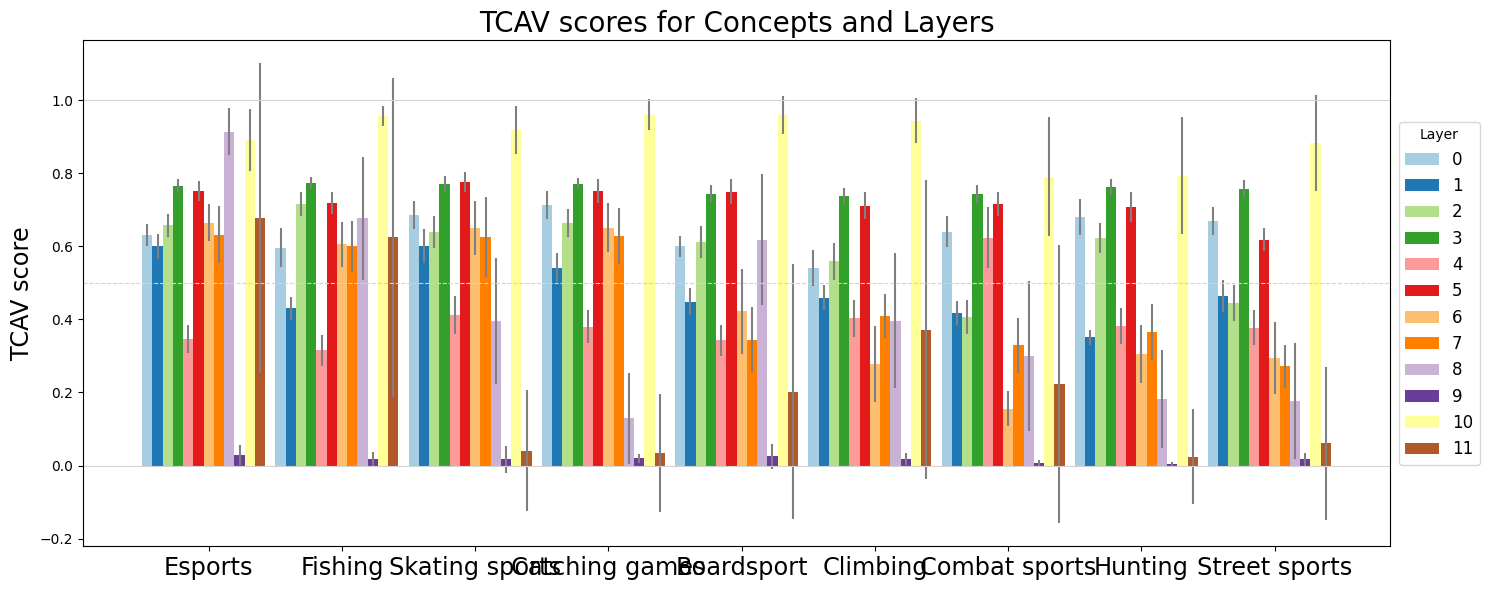

In [28]:
PATH = '/work3/s174498/nlp_tcav_results/'

target = 'positive'
results = '_sport'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(map(lambda x: x.lower(), pos_sig_concepts))
concepts = [x.replace(' ','_') for x in concepts]

PATH =  '/zhome/94/5/127021/speciale/master_project/src/visualization/figures/' #'/work3/s174498/nlp_tcav_results/figures/tweet_concepts/'
BON_NR = 12*(len(folders))
output = plot_results(data, target, concepts ,PATH, plot_hist = False, save_fig = SAVE , t_test_mean = None, bonferroni_nr = BON_NR, names = pos_sig_concepts)

got that data
concept hunting
concept running
concept weightlifting
concept parkour_freerunning
concept athletics
concept electronic_sports
concept board_game
num concepts 7


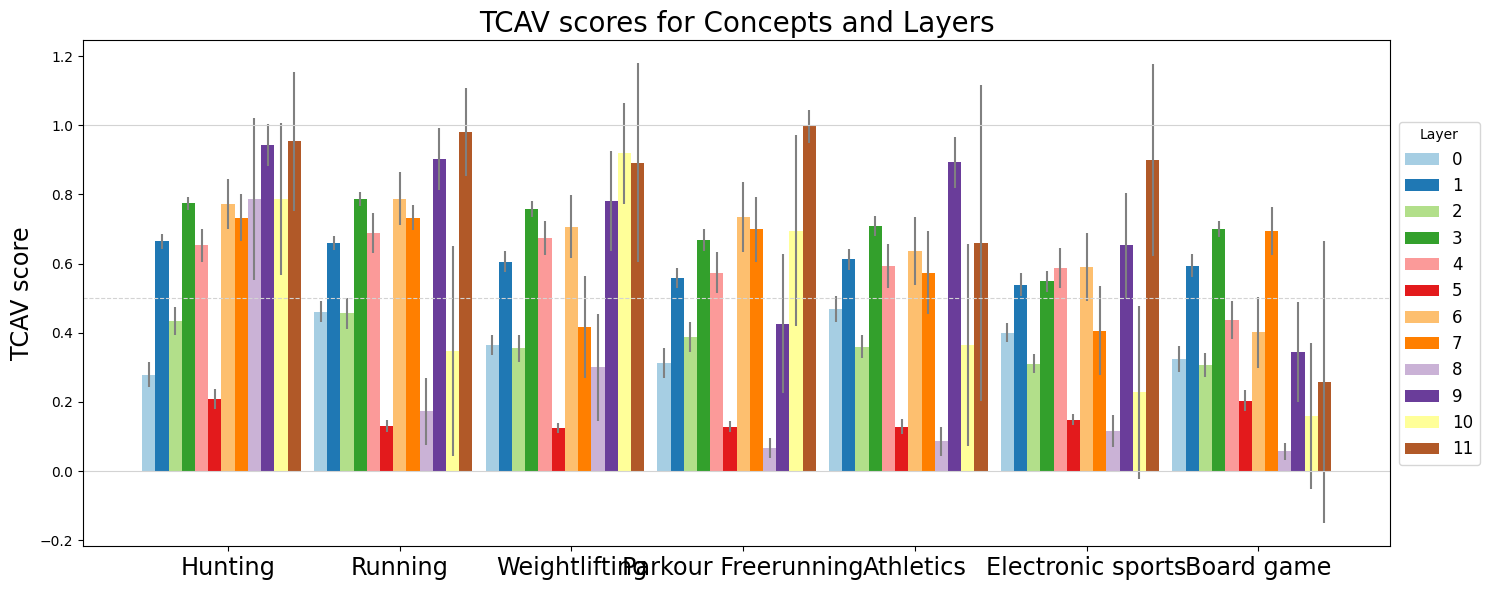

In [18]:
PATH = '/work3/s174498/nlp_tcav_results/'

target = 'negative'
results = '_sport'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(map(lambda x: x.lower(), neg_sig_concepts))
concepts = [x.replace(' ','_') for x in concepts]

PATH =  '/zhome/94/5/127021/speciale/master_project/src/visualization/figures/' #'/work3/s174498/nlp_tcav_results/figures/tweet_concepts/'
BON_NR = 12*(len(folders))
output = plot_results(data, target, concepts ,PATH, plot_hist = False, save_fig = SAVE , t_test_mean = None, bonferroni_nr = BON_NR, names = neg_sig_concepts)

### High mean concepts

In [13]:
neg_mean = s_neg.index.values[0:5]
pos_mean = s_pos.index.values[0:5]

got that data
concept motersport
concept esports
concept net_and_wall_games
concept walking
concept mixed_discipline
num concepts 5
Now overwritting and saving figure


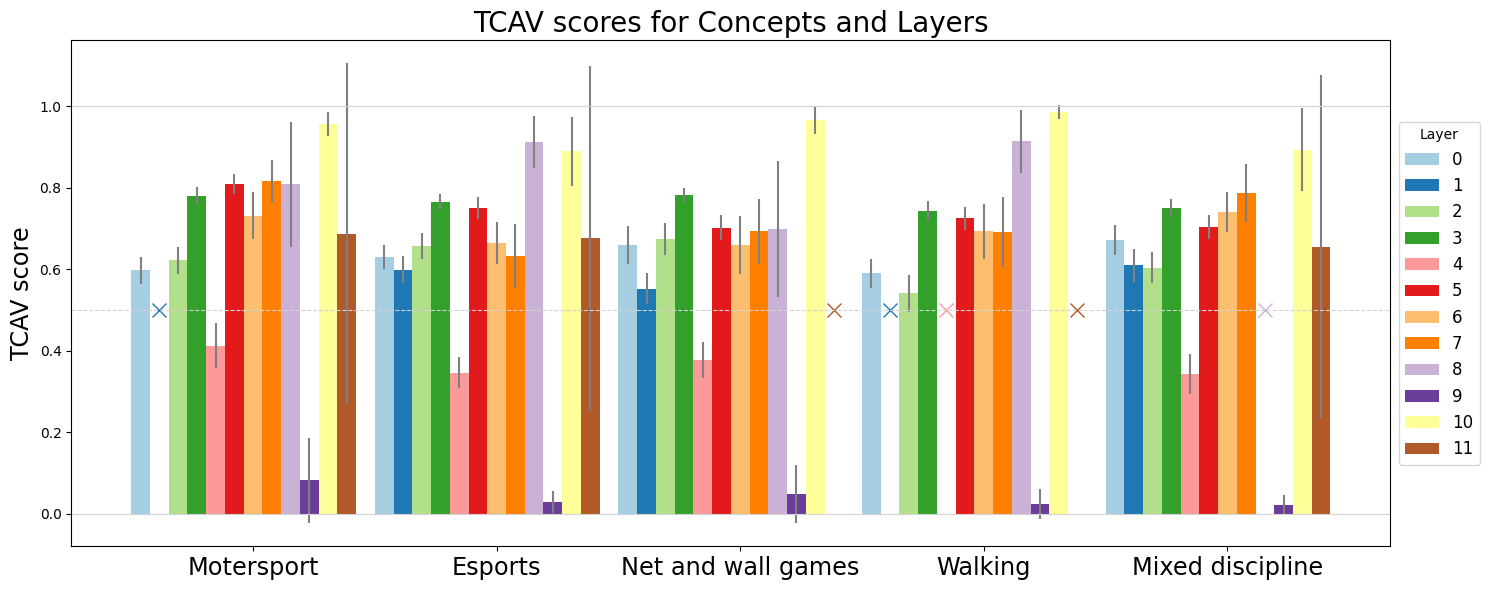

In [14]:
PATH = '/work3/s174498/nlp_tcav_results/'
target = 'positive'
results = '_sport'
SAVE = True
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(map(lambda x: x.lower(), pos_mean))
concepts = [x.replace(' ','_') for x in concepts]

PATH =  '/zhome/94/5/127021/speciale/master_project/src/visualization/figures/' #'/work3/s174498/nlp_tcav_results/figures/tweet_concepts/'
BON_NR = 12*(len(folders))
output = plot_results(data, target, concepts ,PATH, plot_hist = False, save_fig = SAVE , t_test_mean = None, bonferroni_nr = BON_NR, names = pos_mean)

got that data
concept hunting
concept running
concept weightlifting
concept combat_sports
concept street_sports
num concepts 5
Now overwritting and saving figure


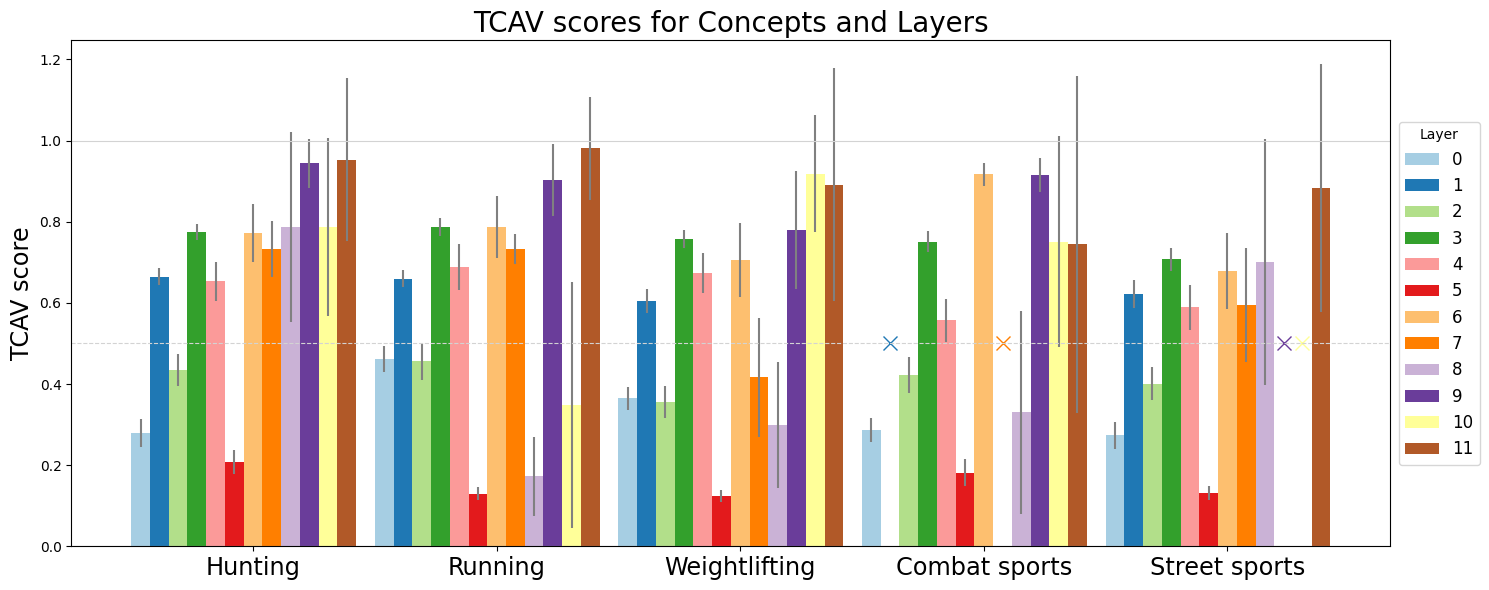

In [15]:
PATH = '/work3/s174498/nlp_tcav_results/'
target = 'negative'
results = '_sport'
SAVE = True
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(map(lambda x: x.lower(), neg_mean))
concepts = [x.replace(' ','_') for x in concepts]

PATH =  '/zhome/94/5/127021/speciale/master_project/src/visualization/figures/' #'/work3/s174498/nlp_tcav_results/figures/tweet_concepts/'
BON_NR = 12*(len(folders))
output = plot_results(data, target, concepts ,PATH, plot_hist = False, save_fig = SAVE , t_test_mean = None, bonferroni_nr = BON_NR, names = neg_mean)

### Top scoring layers (concepts)

In [21]:
neg_top 

array(['Parkour Freerunning', 'Stacking', 'Running', 'Speedcubing',
       'Catching games'], dtype=object)

In [22]:
neg_top = df_neg.sort_values(['mean'],ascending=0)[:5]['concepts'].values
pos_top = df_pos.sort_values(['mean'],ascending=0)[:5]['concepts'].values

got that data
concept kite_sports
concept card_game
concept board_game
concept electronic_sports
concept orienteering_family
num concepts 5


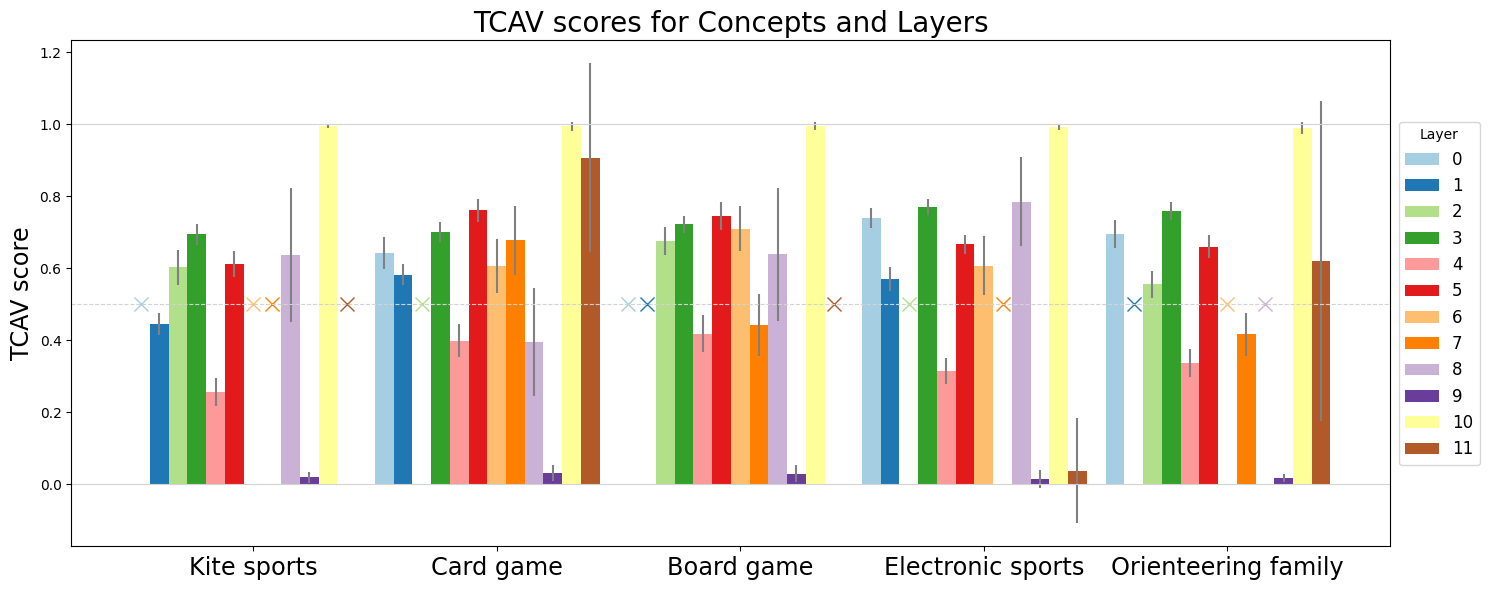

In [25]:
PATH = '/work3/s174498/nlp_tcav_results/'
target = 'positive'
results = '_sport'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(map(lambda x: x.lower(), pos_top))
concepts = [x.replace(' ','_') for x in concepts]

PATH =  '/zhome/94/5/127021/speciale/master_project/src/visualization/figures/' #'/work3/s174498/nlp_tcav_results/figures/tweet_concepts/'
BON_NR = 12*(len(folders))
output = plot_results(data, target, concepts ,PATH, plot_hist = False, save_fig = SAVE , t_test_mean = None, bonferroni_nr = BON_NR, names = pos_top)

got that data
concept parkour_freerunning
concept stacking
concept running
concept speedcubing
concept catching_games
num concepts 5


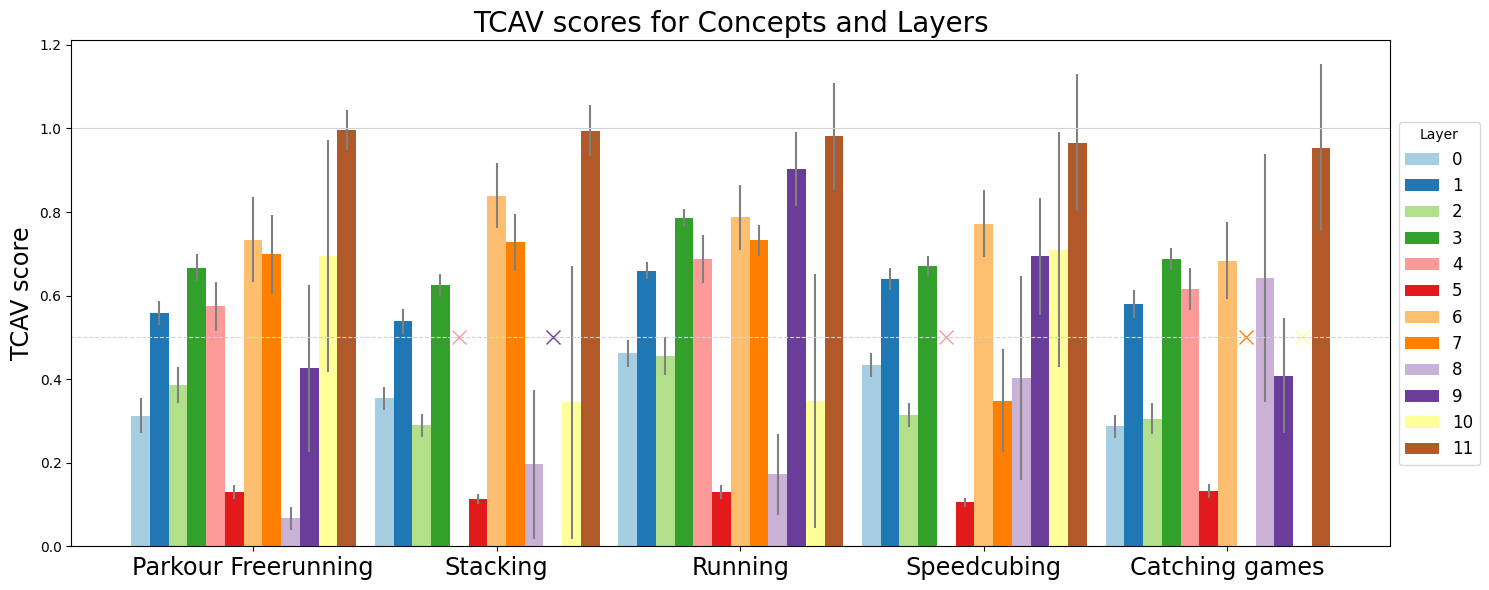

In [24]:
PATH = '/work3/s174498/nlp_tcav_results/'
target = 'negative'
results = '_sport'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(map(lambda x: x.lower(), neg_top))
concepts = [x.replace(' ','_') for x in concepts]

PATH =  '/zhome/94/5/127021/speciale/master_project/src/visualization/figures/' #'/work3/s174498/nlp_tcav_results/figures/tweet_concepts/'
BON_NR = 12*(len(folders))
output = plot_results(data, target, concepts ,PATH, plot_hist = False, save_fig = SAVE , t_test_mean = None, bonferroni_nr = BON_NR, names = neg_top)